# 1. Business Understanding
Credit card fraud is a growing problem in the financial sector, driven by the increasing volume of digital and online transactions. Fraudulent activities result in significant financial losses for banks and credit card issuers, damage customer trust, and increase operational costs related to fraud investigation and chargebacks. As transaction volumes continue to rise, manual fraud detection methods become inefficient, slow, and prone to human error.

Machine learning provides an opportunity to automatically identify suspicious transaction patterns and flag potentially fraudulent transactions in real time. By leveraging historical transaction data, financial institutions can build predictive models that help distinguish between legitimate and fraudulent transactions more accurately.

This project focuses on applying classification techniques to a real-world credit card transaction dataset to address this challenge.

## 1.1 Problem Statement
Financial institutions struggle to accurately detect fraudulent credit card transactions due to the high volume of daily transactions and the fact that fraud cases are rare compared to legitimate ones. Failing to detect fraud leads to direct financial losses, while incorrectly flagging legitimate transactions inconveniences customers and reduces trust.

The problem this project seeks to address is:

How can a machine learning classification model be used to accurately identify fraudulent credit card transactions while minimizing false alarms on legitimate transactions?

## 1.2 Business Objective

### 1.2.1 Primary Objectives
To develop a machine learning classification model that can predict whether a credit card transaction is fraudulent or legitimate, enabling financial institutions to reduce fraud-related losses and improve transaction security.

### 1.2.2 Specific Objectives
- To explore and understand patterns in credit card transaction data that differentiate fraudulent and non-fraudulent transactions.
- To preprocess and prepare transaction data for machine learning, including handling class imbalance and feature scaling where necessary.
- To train and evaluate multiple classification models and compare their performance using appropriate evaluation metrics.
- To minimize false negatives (missed fraud cases) while maintaining reasonable false positive rates to avoid unnecessary transaction declines.

## 1.3 Stakeholders
The stakeholders involved in the business and credit card problem include:

1. Financial Institutions(Banks and Credit Card Issuers)
2. Customers/Cardholders
3. Fraud and Risk Management Teams
4. Regulatory and Compliance Bodies(Indirect Stakeholders)

## 1.4 Business Success Criteria
For a business perspective, this project will be considered successful if the model:

- Accurately Identifies fraudulent transactions
- Minimizes missed fraud cases
- Maintains customer trust by reducing unnecessary transaction blocks
- Provides insights that can support fraud prevention strategies

# 2. Data Understanding


## 2.1 Dataset Choice
This project uses the **Credit Card Fraud Detection dataset** provided by the Machine Learning Group (ULB) and originally analyzed by Andrea Dal Pozzolo et al. The dataset contains credit card transactions made by European cardholders in September 2013.

🔗 Dataset source (Kaggle): https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Reasons for choosing this dataset:**
- Represents a real-world financial fraud detection problem
- Suitable for binary classification
- Contains a large number of observations and features
- Presents a realistic challenge due to extreme class imbalance

## 2.2 Import necessary Libraries

In [104]:
import warnings
warnings.filterwarnings('ignore')  # ignore warnings

# Data Handling and Exploration
import numpy as np # numerical operators
import pandas as pd # data loading and manipulation
import lightgbm as lgb

# Visualizations
import matplotlib.pyplot as plt   # basic plotting
import seaborn as sns   # advanced plotting

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Machine Learning model
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc, precision_score, precision_recall_curve, average_precision_score, recall_score, f1_score
)

# Classifiers
from sklearn.tree import DecisionTreeClassifier        # Decision Tree
from sklearn.ensemble import RandomForestClassifier    # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from xgboost import XGBClassifier


# Handling imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Saving trained models
import joblib

## 2.3 Initial Checks/Exploration

### 2.3.1 Load Data

In [59]:
data = pd.read_csv("../Data/creditcard.csv.zip", compression="zip")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.3.2 Inspect the data

In [60]:
data.shape

(284807, 31)

The dataset shape clearly shows that the dataset contains **284,807 observations** and **31 features**. 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Most of the variables are of type `float64`, which is expected since the features V1–V28 are PCA-transformed numerical variables, while the target variable, `Class`, is of type `int64`

Check null values

In [62]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It's clear that there are no missing values in the dataset.


In [63]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Inspect the Duplicates and decide whether to drop them

In [64]:
# Check for duplicates in the dataset
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

# Optionally, show the breakdown of duplicates by class
duplicate_classes = data[data.duplicated(keep=False)]['Class'].value_counts()
print("\nDuplicate rows by Class:")
print(duplicate_classes)


Number of duplicate rows in the dataset: 1081

Duplicate rows by Class:
Class
0    1822
1      32
Name: count, dtype: int64


### 2.3.3 Handling Duplicate Transactions

The dataset contains some duplicate rows, but we choose to retain them. Dropping duplicates could inadvertently remove genuine fraudulent transactions or repeated legitimate transactions, which are important for accurately modeling real-world behavior. Keeping these duplicates ensures that the model learns from the complete distribution of transactions, including rare but significant fraud patterns. This approach helps maintain the integrity of the dataset for training and evaluation.

Let's check for unique values in the target `class`

In [65]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

From the ULB / Kaggle documentation:
   
   - **Class 1** is `Fraudulent transaction`
   - **Class 0** is `Legitimate transaction` (Normal)

The table below shows that fraudulent transactions make up only a tiny fraction of all transactions, emphasizing the need for careful handling of class imbalance during modeling.”

In [66]:
class_counts = data["Class"].value_counts()
class_percentages = data["Class"].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "Count": class_counts,
    "Percentage (%)": class_percentages.round(3)
})

summary


,Count,Percentage (%)
Class,,
0,284315,99.827
1,492,0.173


## 2.2 Dataset Description
- **Total transactions:** 284,807  
- **Fraudulent transactions:** 492  
- **Fraud rate:** 0.172%  
- **Time period:** Two consecutive days  

The dataset is highly imbalanced, with fraudulent transactions representing a very small fraction of all observations. This makes it ideal for demonstrating data preparation and modeling strategies for imbalanced classification problems.

## 2.3 Features
- **V1–V28:** PCA-transformed numerical features. The original transaction features were anonymized for confidentiality, so Principal Component Analysis (PCA) was applied to reduce dimensionality while retaining the most important patterns in the data. These transformed features allow machine learning models to learn from the underlying variance in the original dataset without exposing sensitive information. 
- **Time:** Seconds elapsed between each transaction and the first transaction  
- **Amount:** Transaction amount  
- **Class (Target Variable):**  
  - 1 → Fraudulent transaction  
  - 0 → Legitimate transaction (Normal)  

All features are numerical, making the dataset suitable for machine learning models without categorical encoding.

**NOTE:** The dataset is highly imbalanced, with fraudulent transactions representing only 0.172% of all observations. This characteristic will be important to consider during model training and evaluation.

# 3. Exploratory Data Analysis(EDA)

## 3.1 Class Distribution (Fraud vs Normal)

Class
0    284315
1       492
Name: count, dtype: int64


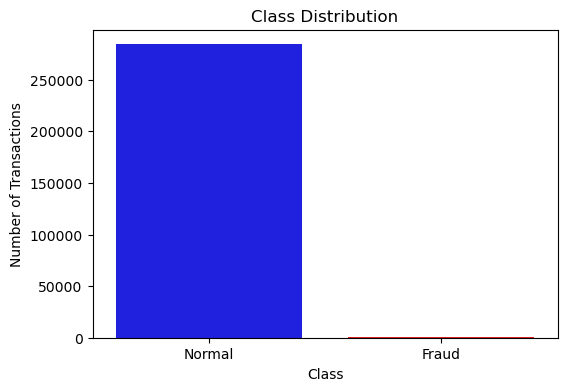

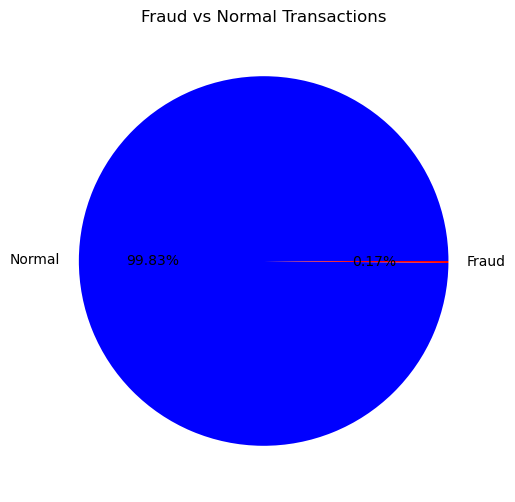

In [67]:
# Count of each class
class_counts = data['Class'].value_counts()
print(class_counts)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['blue','red'])
plt.xticks([0,1], ['Normal', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.title('Class Distribution')
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Normal','Fraud'], autopct='%1.2f%%', colors=['blue', 'red'])
plt.title('Fraud vs Normal Transactions')
plt.show()


Normal transactions account for approximately 99.83% of all observations, while fraudulent transactions represent only 0.17%. 
This imbalance indicates that fraud cases are extremely rare compared to legitimate transactions. As a result, traditional evaluation metrics such as accuracy may be misleading, since a model can achieve high accuracy by simply predicting all transactions as non-fraud.

Therefore, special handling technique, such as resampling an d the use of appropriate evaluation metrics (precision, recall, F1-score, PR-AUC) will be necessary in subsequent modelling stages.



## 3.2 Transaction Volume and Fraud Patterns Over Time

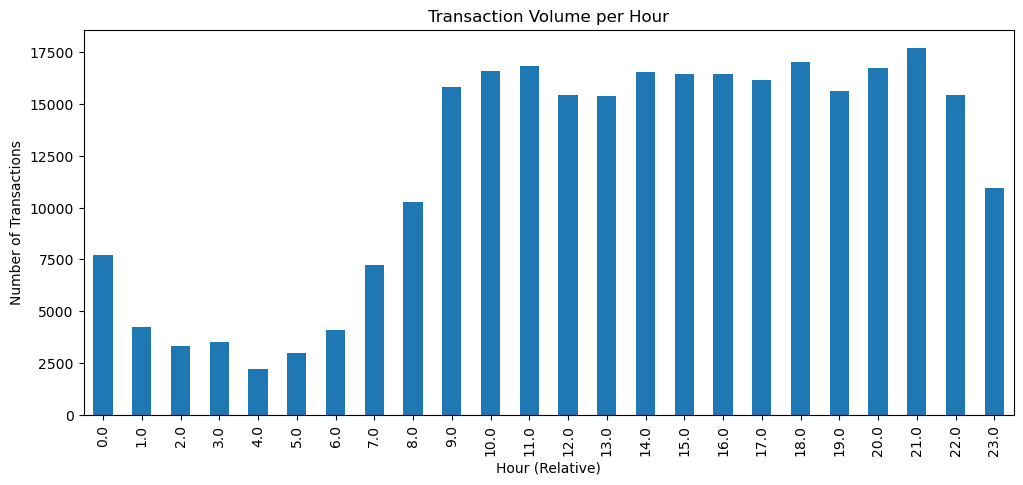

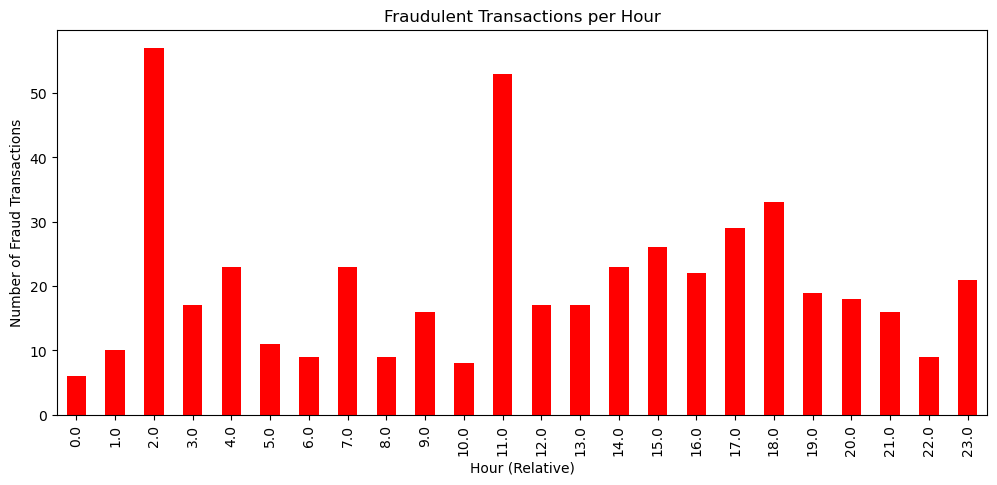

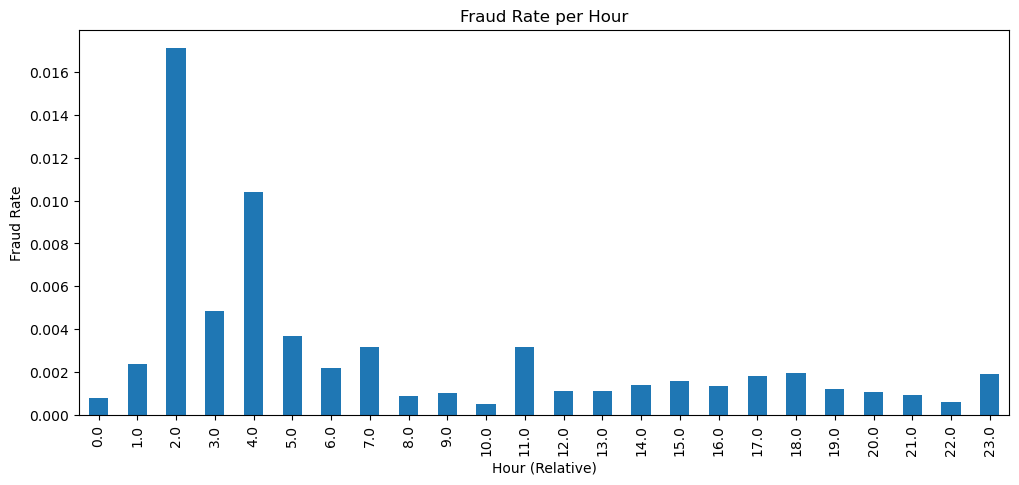

In [68]:
# Transactions per Hour(All Transactions)

# Convert Time to hour bins
data['Hour'] = (data['Time'] // 3600) % 24

plt.figure(figsize=(12,5))
data.groupby('Hour').size().plot(kind='bar')
plt.title('Transaction Volume per Hour')
plt.xlabel('Hour (Relative)')
plt.ylabel('Number of Transactions')
plt.show()

# Fraudulent Transactions per Hour
plt.figure(figsize=(12,5))
fraud_df = data[data['Class'] == 1]
fraud_df.groupby('Hour').size().plot(kind='bar', color='red')
plt.title('Fraudulent Transactions per Hour')
plt.xlabel('Hour (Relative)')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# Fraud Rate per Hour

# Total transactions per hour
total_per_hour = data.groupby('Hour').size()

# Fraud transactions per hour
fraud_per_hour = data[data['Class'] == 1].groupby('Hour').size()

# Fraud rate
fraud_rate = (fraud_per_hour / total_per_hour).fillna(0)

plt.figure(figsize=(12,5))
fraud_rate.plot(kind='bar')
plt.title('Fraud Rate per Hour')
plt.xlabel('Hour (Relative)')
plt.ylabel('Fraud Rate')
plt.show()


The analysis of transaction volume across hourly intervals reveals non-uniform temporal patterns in both legitimate and fraudulent transactions. While overall transaction activity is distributed throughout the day, fraudulent transactions show higher concentration during specific hourly periods.

Further examination using fraud rate per hour highlights time windows where the proportion of fraudulent transactions is elevated relative to total activity. Although the time variable represents relative time since the first recorded transaction rather than actual clock time, these patterns indicate meaningful temporal behavior.

The observed trends support the inclusion of time-based features such as hourly bins in the modeling process and suggest that temporal information can contribute to improved fraud detection performance.

## 3.3 Correlation Heatmap

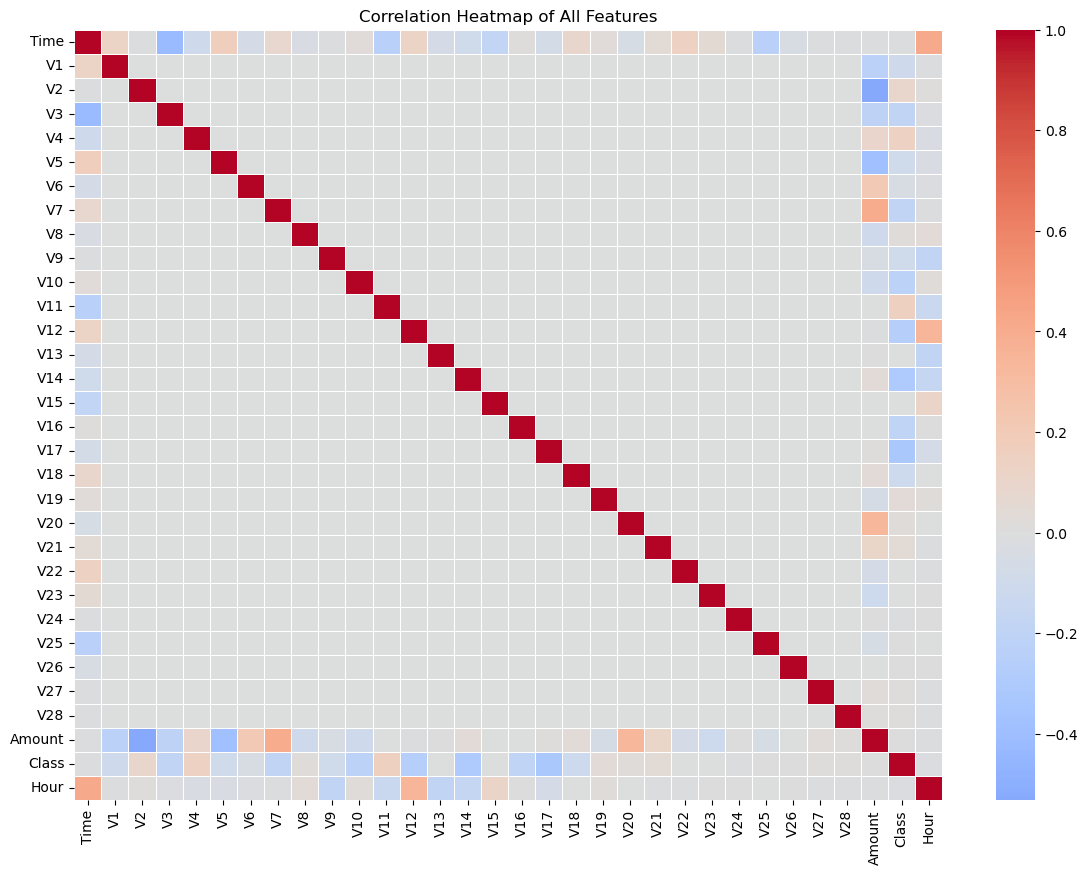

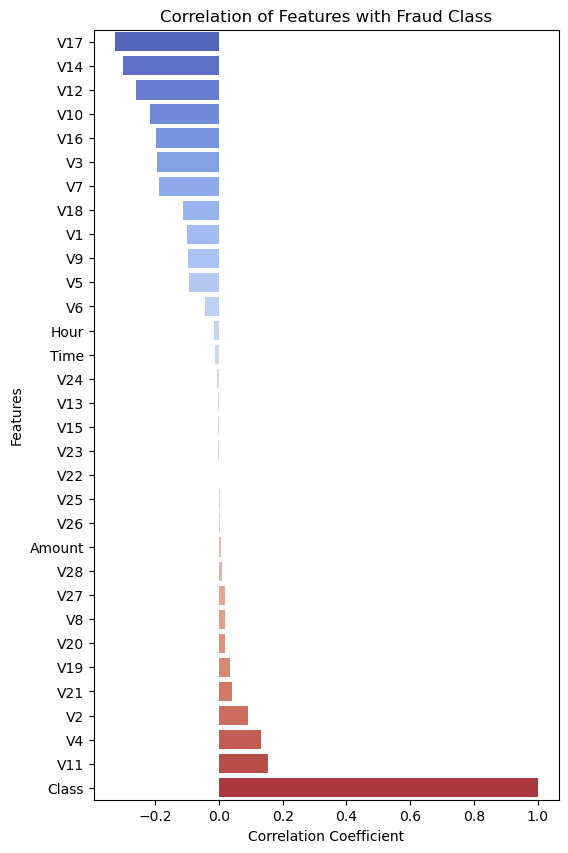

In [69]:
# Compute correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Correlation of features with target variable
target_corr = corr_matrix['Class'].sort_values()

plt.figure(figsize=(6,10))
sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


Several PCA-transformed features exhibit strong positive or negative correlations with the target variable (Class). Features such as V10, V12, V14, and V17 show the highest absolute correlation values, indicating strong predictive potential for fraud detection.

The transaction amount shows relatively weak linear correlation with fraud, suggesting that fraud detection relies more on behavioral patterns rather than transaction size alone.

These findings support the use of tree-based models and non-linear classifiers, which can capture complex relationships between features.

## 3.4 Features Distribution

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1

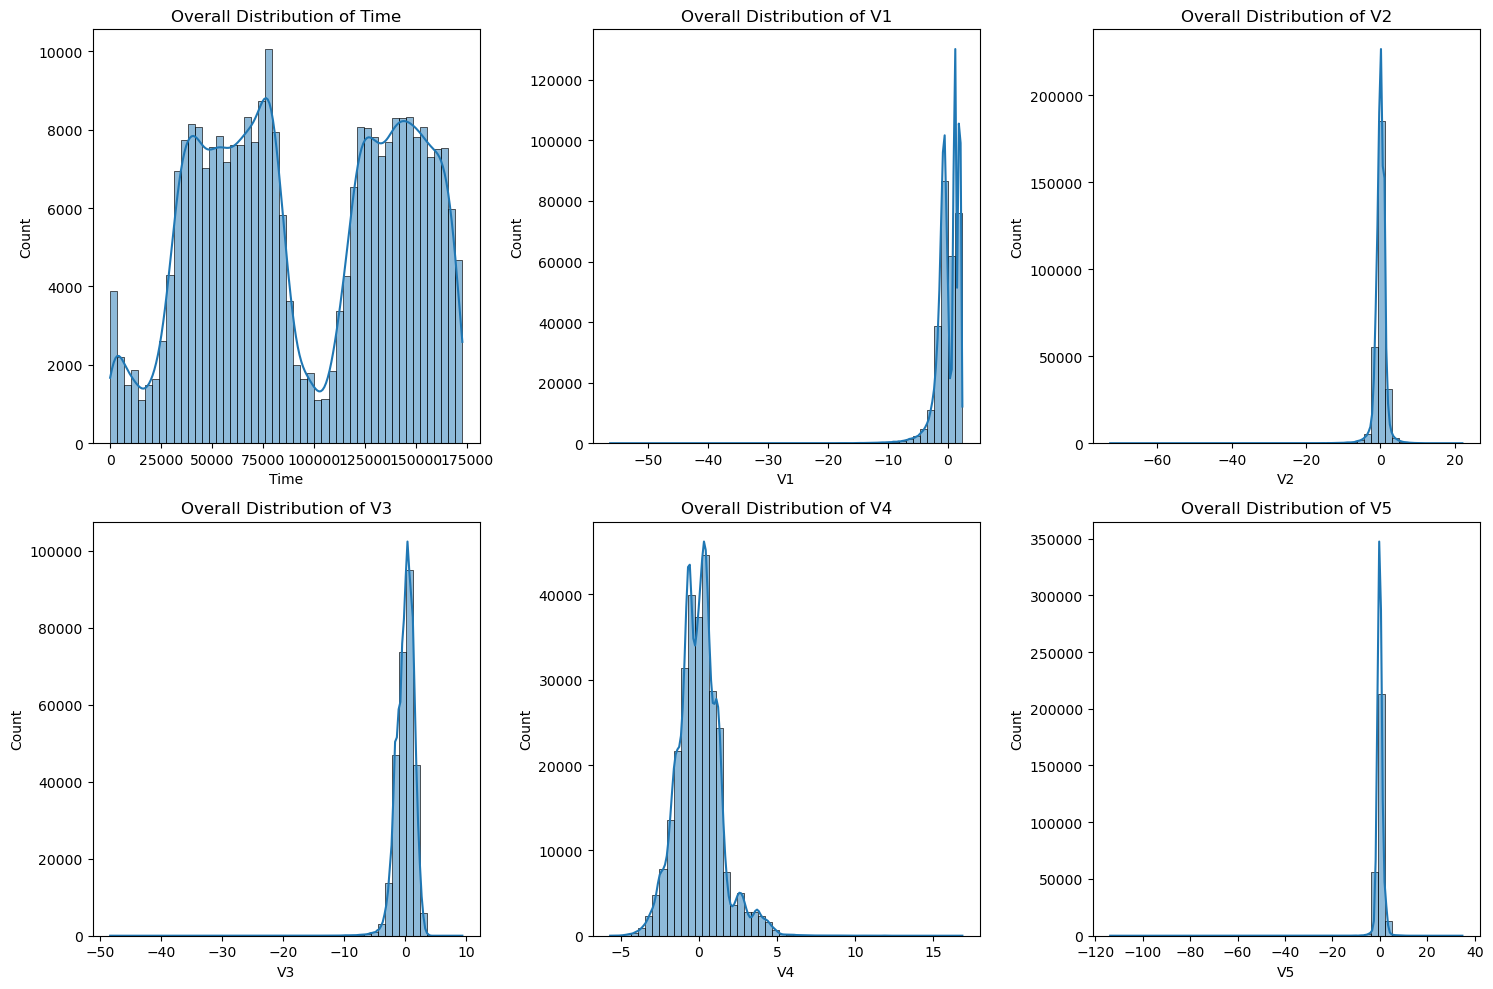

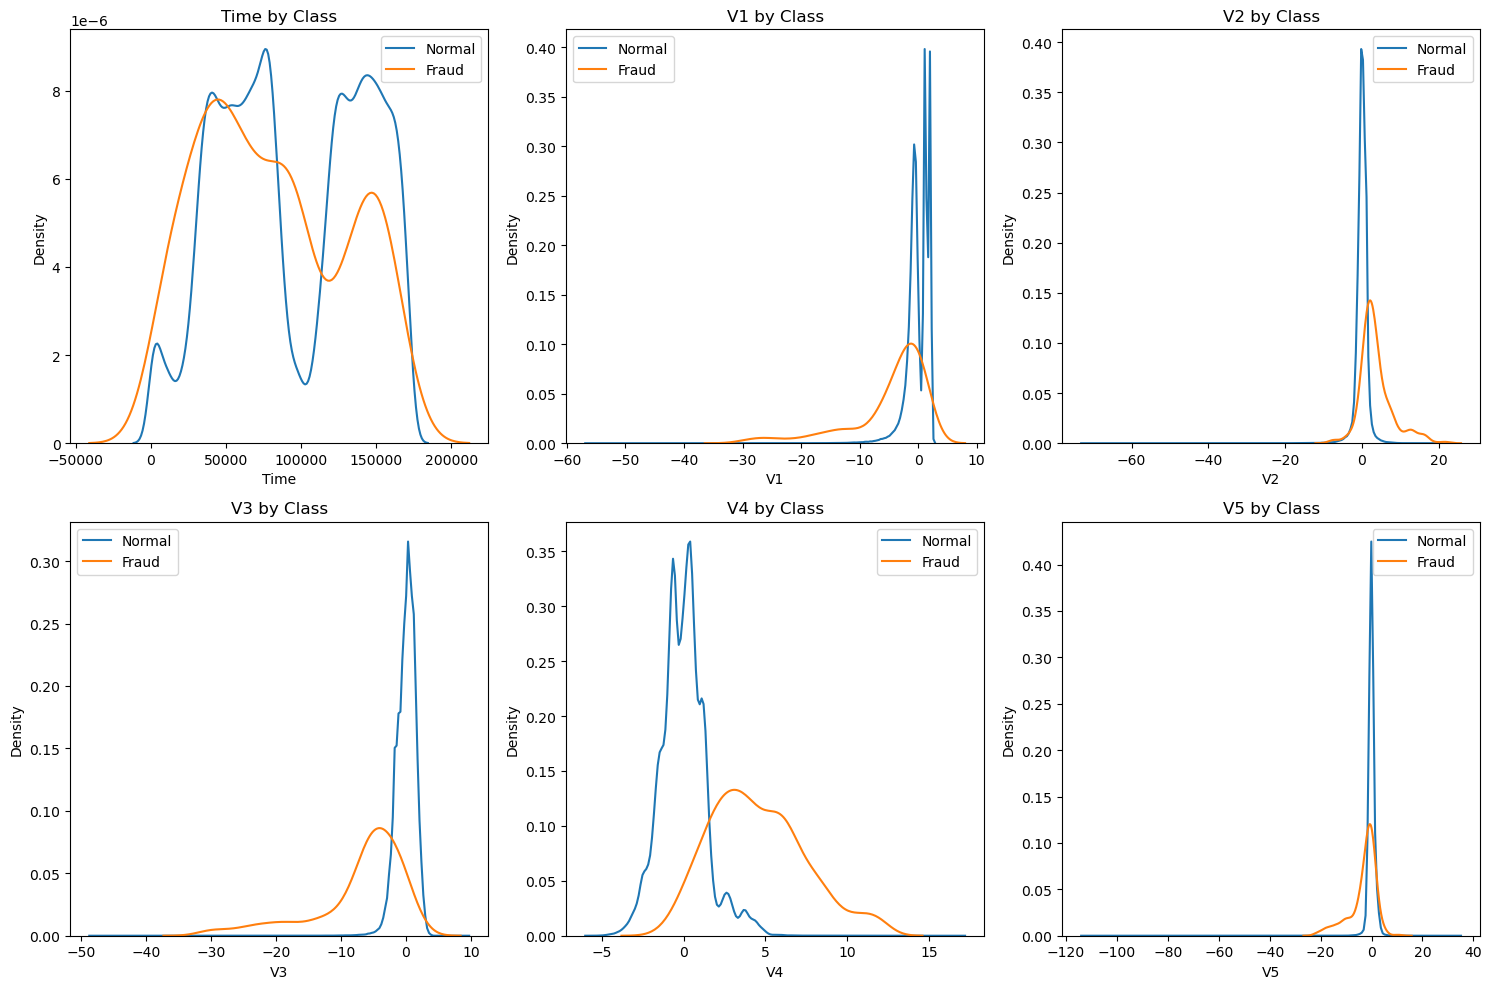

In [70]:
# Summary Statistics
print("Summary Statistics:")
print(data.describe())

# Select Numerical Features (Exclude Target)

features = data.columns.drop('Class')

# Limit number of features for readability (first 6)
features_to_plot = features[:6]

# Overall Feature Distributions

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Overall Distribution of {feature}')
plt.tight_layout()
plt.show()


# Feature Distributions by Class

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['Class'] == 0][feature], label='Normal')
    sns.kdeplot(data[data['Class'] == 1][feature], label='Fraud')
    plt.title(f'{feature} by Class')
    plt.legend()
plt.tight_layout()
plt.show()


The class-conditional distribution analysis reveals clear and consistent differences between fraudulent and non-fraudulent transactions across several features. PCA-transformed variables such as V1, V2, V3, V4, and V5 exhibit strong separation between classes, indicating their high predictive potential.

Fraudulent transactions tend to occupy distinct regions of the feature space, often characterized by shifted means and broader distributions compared to normal transactions. Additionally, temporal patterns suggest that fraud activity is not uniformly distributed over time.

These findings confirm that the dataset contains meaningful structure suitable for supervised learning and justify the use of machine learning models capable of capturing non-linear relationships for fraud detection.

# 4. Data Preparation
This section outlines the data preparation steps undertaken to ensure reliable and leakage-free fraud detection modelling. The dataset was first split into training and testing sets to prevent data leakage. Given the extreme class imbalance inherent in fraud detection, SMOTE was applied exclusively to the training data to oversample the minority fraud class. Feature scaling was then performed using parameters learned solely from the training set to ensure consistency while maintaining the integrity of the test data. This structured pipeline ensured realistic model evaluation and robust fraud detection performance.

## 4.1 Train-Test Split

We split the data first before scaling so as not to leak information into the training set.

In [71]:
X= data.drop('Class', axis=1)
y= data['Class']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y # stratify preserves the original fraud ratio in both sets.
) 

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227845, 31)
X_test shape: (56962, 31)
y_train shape: (227845,)
y_test shape: (56962,)


The dataset was split into 80% training and 20% testing data, preserving the feature and target dimensions.

## 4.2 Handling Class Imbalance(`Training Data Only`)

This is critical because, Fraud cases are rare and models tend to ignore `fraud` unless correction is made.

**SMOTE**(`OverSampling`) technique is used which enhances the creation of synthetic samples  & improving the minority class learning.

In [73]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


Before SMOTE, the fraud class was very small. SMOTE oversampling generated synthetic fraud samples, balancing it with the normal class. Undersampling wasn’t suitable because the dataset is highly imbalanced (0.1% fraud vs 99.9% normal) and `Fraud` is rare. So removing normal transactions would discard valuable information and make the dataset too small, harming model performance.

## 4.3 Visualization Before and After SMOTE

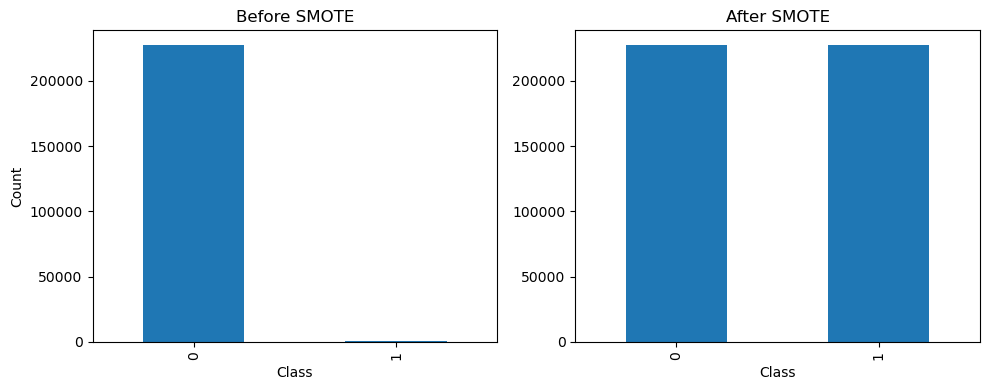

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

y_train.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

y_train_res.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")

plt.tight_layout()
plt.show()


The bar plot shows a severe class imbalance before `SMOTE`, with `fraud transactions` being underrepresented. After applying `SMOTE` to the training data, the `Class` distribution becomes balanced, enabling the model to learn meaningful `fraud` patterns.

## 4.4 Feature Scaling/Normalization(`After SMOTE`)

Scaling is crucial since algorithms like Logistic Regression, KNN & SVM are sensitive to feauture magnitude.

In [75]:
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train_res)

# Apply learned parameters to test data
X_test_scaled = scaler.transform(X_test)

Features were standardized so that the training data has a `mean of 0 and standard deviation of 1`. The same scaling parameters were applied to the test data to ensure consistent feature scaling and prevent data leakage.

## 4.5 Visualization of feature Distribution Before and After Scaling

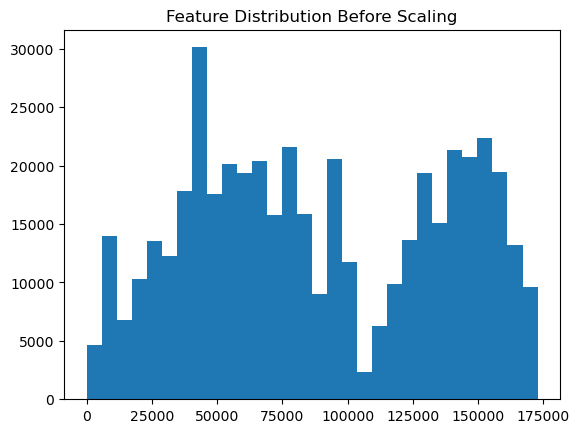

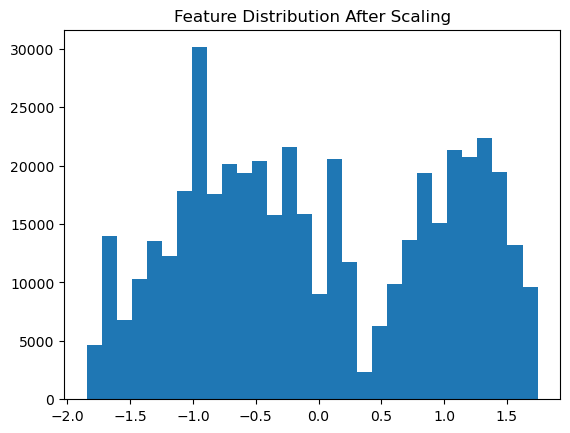

In [76]:
plt.hist(X_train_res.iloc[:,0], bins=30)
plt.title("Feature Distribution Before Scaling")
plt.show()

plt.hist(X_train_scaled[:,0], bins=30)
plt.title("Feature Distribution After Scaling")
plt.show()

The feature distribution before scaling shows values spanning a wide numerical range, which can negatively affect models sensitive to feature magnitude. After applying standardization, the same feature is centered around zero with unit variance while maintaining its original distribution shape. This transformation ensures that all features contribute equally during model training. Importantly, scaling parameters were learned only from the training data to avoid data leakage.

# 5 Model Training and Evaluation

In [92]:
#  Define models and hyperparameters

models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(class_weight='balanced', random_state=42)
}

params = {
    "LogisticRegression": {
        'model__C': [0.01, 0.1, 1, 10]
    },
    "XGBoost": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.01, 0.1]
    },
    "LightGBM": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [-1, 10, 20],
        'model__learning_rate': [0.01, 0.1]
    }
}

#  Loop through models

results = {}

for name in models:
    print(f"Training {name}...")
    

Training LogisticRegression...
Training XGBoost...
Training LightGBM...


## 5.1 Logistic Regression (`baseline`)

In [87]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_res)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=['Normal', 'Fraud']))

confusion_matrix(y_test, y_pred_lr)


Logistic Regression
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
       Fraud       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



array([[56287,   577],
       [   10,    88]], dtype=int64)

- Recall (Fraud) = 0.90
The model correctly detects 90% of fraudulent transactions.
In absolute terms, out of 98 fraud cases, approximately 88 were correctly detected while 10 were missed.
This is desirable in fraud detection since missing fraud is costly.

- Precision (Fraud) = 0.13
Only 13% of transactions predicted as fraud are truly fraudulent, indicating a high number of false positives.
This can lead to customer inconvenience and increased investigation costs.

- F1-score (Fraud) = 0.23
The low F1-score reflects a poor balance between recall and precision.

- Accuracy = 0.99 (misleading)
Due to the extreme class imbalance, accuracy is not a reliable metric, as predicting most transactions as Normal yields high accuracy.

**NOTE** Logistic Regression performs well as a baseline model but is not suitable as a final fraud detection model.

## 5.2 XGBoost (`baseline`)

In [88]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train_res)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Fraud']))


XGBoost
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     56864
       Fraud       0.19      0.90      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.65     56962
weighted avg       1.00      0.99      1.00     56962



- Recall (Fraud) = 0.90
The model detects 90% of fraudulent transactions.
Out of 98 fraud cases, approximately 88 were correctly identified and 10 were missed.

- Precision (Fraud) = 0.19
Only 19% of predicted fraud cases are actual fraud, indicating a large number of false positives, though slightly better than Logistic Regression.

- F1-score (Fraud) = 0.31
The F1-score shows an improvement over Logistic Regression but still indicates an imbalanced trade-off between recall and precision.

- Accuracy = 0.99 (misleading)
As with other models, accuracy remains inflated due to class imbalance and does not reflect true fraud detection performance.

**NOTE** XGBoost shows strong fraud detection ability but requires further optimization to reduce false positives.

## 5.3 LightGBM (`baseline`)

In [89]:
lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train_scaled, y_train_res)
y_pred_lgb = lgbm.predict(X_test_scaled)

print("LightGBM")
print(classification_report(y_test, y_pred_lgb, target_names=['Normal', 'Fraud']))


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.60      0.80      0.68        98

    accuracy                           1.00     56962
   macro avg       0.80      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962



- Recall (Fraud) = 0.80
The model correctly detects 80% of fraudulent transactions.
Out of 98 fraud cases, approximately 78 were detected and 20 were missed.

- Precision (Fraud) = 0.60
60% of transactions predicted as fraud are truly fraudulent, indicating a much lower false-positive rate compared to other models.

- F1-score (Fraud) = 0.68
The high F1-score indicates a strong balance between recall and precision.

- Accuracy = 1.00 (interpreted with caution)
While accuracy is high, evaluation is primarily based on fraud-class metrics due to class imbalance.

**NOTE** LightGBM provides the best trade-off between detecting fraud and minimizing false alarms, making it the strongest candidate for further optimization.

## 5.4 Model Evaluation (`Baseline Comparison`)

In [90]:
models_baseline = {
    "Logistic Regression": y_pred_lr,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb
}

rows = []

for name, preds in models_baseline.items():
    rows.append({
        "Model": name,
        "Precision (Fraud)": precision_score(y_test, preds),
        "Recall (Fraud)": recall_score(y_test, preds),
        "F1-score (Fraud)": f1_score(y_test, preds)
    })

baseline_results = pd.DataFrame(rows)
baseline_results


,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud)
0,Logistic Regression,0.132331,0.897959,0.230668
1,XGBoost,0.189655,0.897959,0.313167
2,LightGBM,0.595420,0.795918,0.681223


Based on F1-score and practical trade-offs between recall and precision, LightGBM and XGBoost are selected for hyperparameter tuning, while Logistic Regression is excluded.

## 5.5 Hyperparameter Tuning(`Only for best models`)

We tune the top performers models

In [93]:
# XGBoost Hyperparameter Tuning

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train_res)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("\nClassification Report for Tuned XGBoost:\n")
print(classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Fraud']))

#  LightGBM Hyperparameter Tuning

lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1]
}

lgbm = lgb.LGBMClassifier(
    class_weight='balanced',
    random_state=42
)

lgb_grid = GridSearchCV(
    estimator=lgbm,
    param_grid=lgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

lgb_grid.fit(X_train_scaled, y_train_res)

best_lgbm = lgb_grid.best_estimator_
y_pred_lgb = best_lgbm.predict(X_test_scaled)

print("Best LightGBM Parameters:", lgb_grid.best_params_)
print("\nClassification Report for Tuned LightGBM:\n")
print(classification_report(y_test, y_pred_lgb, target_names=['Normal', 'Fraud']))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Classification Report for Tuned XGBoost:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.75      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

- `XGBoost` is the final model choice for fraud detection due to highest F1-score and optimal trade-off between recall and precision.

- `LightGBM` is also strong and can serve as an alternative if computational efficiency or other deployment considerations are important.

- `Logistic Regression` remains a useful baseline for understanding model performance but is not suitable for production deployment.

**NOTE** `LightGBM` remains a strong, reliable model. However, after tuning, `XGBoost` outperforms `LightGBM` in both `F1-score` and practical fraud detection `trade-offs`.

## 5.6 Final Model Selection

Compare models in a table after Tuning

In [ ]:
# Metrics for the fraud class
metrics_data = {
    'Model': ['Logistic Regression', 'XGBoost (Tuned)', 'LightGBM (Tuned)'],
    'Precision (Fraud)': [0.13, 0.75, 0.60],
    'Recall (Fraud)': [0.90, 0.87, 0.80],
    'F1-score (Fraud)': [0.23, 0.81, 0.68]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df


,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud)
0,Logistic Regression,0.13,0.90,0.23
1,XGBoost (Tuned),0.75,0.87,0.81
2,LightGBM (Tuned),0.60,0.80,0.68


# 6. Model Validation/Performance Analysis

## 6.1 Confusion Matrix
Shows how many fraud and normal transactions were correctly or incorrectly classified.

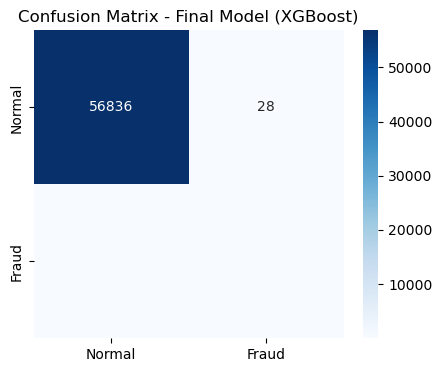

In [96]:
# Predictions with the final XGBoost model

y_pred_final = best_xgb.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.title('Confusion Matrix - Final Model (XGBoost)')
plt.show()


## 6.2 ROC-AUC Curve 
Measures the model’s ability to discriminate between fraud and normal transactions.

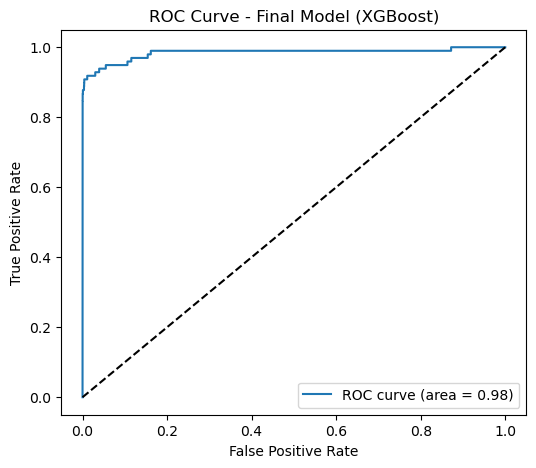

In [107]:
y_prob_final = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model (XGBoost)')
plt.legend(loc='lower right')
plt.show()



A ROC-AUC close to 1 indicates excellent discrimination

## 6.3 Precision-Recall Curve
Helps visualize the trade-off between detecting fraud vs false positives.

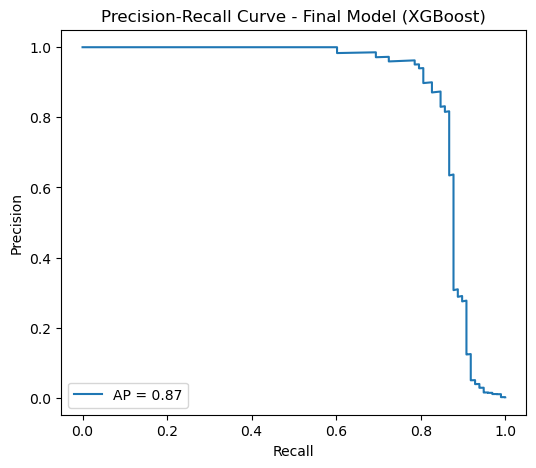

In [105]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_final)
ap_score = average_precision_score(y_test, y_prob_final)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Final Model (XGBoost)')
plt.legend()
plt.show()


# 7. Model Interpretation / Feature Importance

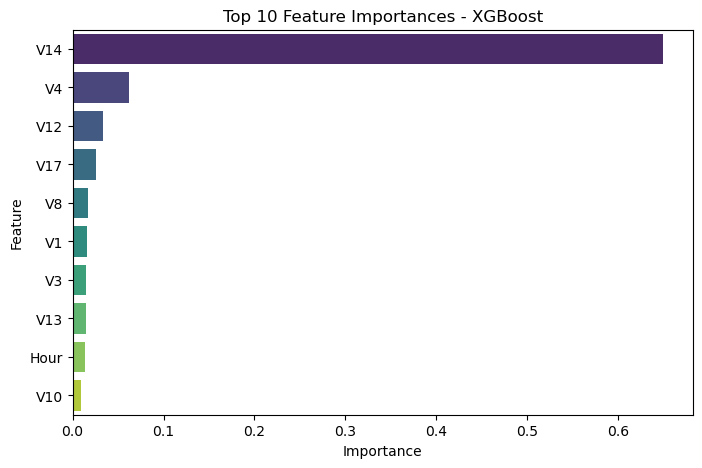

In [99]:
# Get feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()
